In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prim
import seaborn as sns
from sklearn import mixture
import os
from clustering_and_prim_tools import *

In [170]:
%matplotlib inline

In [171]:
sns.set_context("poster",rc={"font.size": 28})
sns.set_style("whitegrid")

In [172]:
invfolder = "C:\\Users\\WB451855\OneDrive - WBG\\!infra_needs_data\\water_iiasa_output_data\\"

In [227]:
data = pd.read_excel(invfolder+"data_WB_Irrigation_11june18.xlsx",sheetname="data_WB_Irrigation_11june18")

## Test the data

In [228]:
data.columns

Index(['Region', 'Var', 'Unit', 'Item', 'Macro', 'Sensitivity',
       'InvestmentType', 'Year', 'Val'],
      dtype='object')

In [229]:
data = data.reset_index().set_index(['Region', 'Var', 'Unit', 'Item', 'Macro', 'Sensitivity','InvestmentType', 'Year'])

In [230]:
data.unstack("Var").columns

MultiIndex(levels=[['index', 'Val'], ['AREA', 'ARIR', 'ARRF', 'ASYS2', 'CALO', 'CCSYS', 'CC_D06', 'CONS', 'CSYS', 'EMIS', 'GDPC', 'GDPC_D06', 'GDPD', 'GDPD_D06', 'GDPT', 'LAND', 'NETT', 'NTMS2', 'PROD', 'WDEM', 'WEFF', 'WSECT', 'XPRI', 'YILM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]],
           names=[None, 'Var'])

In [231]:
data.unstack("Item").columns

MultiIndex(levels=[['index', 'Val'], ['ABNNAT', 'AGR', 'ALL_TOTAL', 'ALMILK', 'BARL', 'BEAD', 'BVMEAT', 'CASS', 'CER', 'CH4', 'CHKP', 'CORN', 'COTT', 'CRP', 'CRPLND', 'DEPRECIATION', 'DOMESTIC', 'EFFICIENCY', 'EXPANSION', 'FOREST', 'GNUT', 'GRSLND', 'INDUSTRIAL', 'IR_DRIP', 'IR_SPRINK', 'IR_SURFACE', 'IR_TOTAL', 'LSP', 'LUC', 'MILL', 'N2O', 'NATLND', 'OPAL', 'PGMEAT', 'PLTFOR', 'POTA', 'PTEGGS', 'PTMEAT', 'RAPE', 'RF_HIGH', 'RF_LOW', 'RF_SUBST', 'RF_TOTAL', 'RICE', 'SGMEAT', 'SHARE_AG_SWATRISK', 'SHARE_AG_SWUNSUSEFR', 'SHARE_EFRATRISK', 'SOYA', 'SRGH', 'SUGC', 'SUNF', 'SWPO', 'TOT', 'UPGRADE', 'WHEA']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

In [232]:
data.reset_index().Sensitivity.unique()

array(['Baseline', 'Region AFR MaxInvest', 'Region ECA MaxInvest',
       'Region EAP MaxInvest', 'Region LCR MaxInvest',
       'Region MNA MaxInvest', 'Region SAR MaxInvest', 'RCP2p6_GDFL',
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR',
       'RCP8p5_GDFL', 'RCP8p5_HadGEM', 'RCP8p5_HadGEM_noCO2',
       'RCP8p5_IPSL', 'RCP8p5_MIROC', 'RCP8p5_NOR', 'HealthyDiet',
       'HealthySustDiet', 'TradeOpen', 'TradeRestr', 'WatrEff_High',
       'WatrEff_Low', 'Combined_High', 'Combined_High2', 'Combined_Low',
       'Combined_Low2'], dtype=object)

In [233]:
data.reset_index().Unit.unique()

array(['1000 Ha', '1000 t', 'million USD 2005', 'Percent', 'fm t/ha',
       'USD 2000 per ton', 'million USD 2000', 'Bn USD 2005', 'kg/m3',
       'percent2', '1000 t dm', 'kcal/cap/d', 'Mt CO2eq/yr', 'km3',
       'Percent2', 'dm t/ha'], dtype=object)

In [234]:
data.reset_index().Year.unique()

array([2030, 2010, 2050, 2100, 2080, 2060, 2040, 2090, 2020, 2070], dtype=int64)

### there are two different "percent2" values so makes sure there is only one

In [235]:
data = data.reset_index("Unit")
data['Unit'] = data.Unit.replace({"Percent2":"percent2"})
data = data.set_index("Unit",append=True)

## earlier version: I discount by dividing the number in a given year by 10 and spreading the cost over 10 years

In [182]:
np.arange(2011,2021)

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [236]:
def discount_sum_over_10_years(row,name,d):
    return np.sum([row[name]/10*(1+d)**(1-(year-2010)) for year in np.arange(row["Year"]-9,row["Year"]+1)])

In [237]:
costs_global = data.unstack("Var")["Val"]["CSYS"].unstack("Unit")["million USD 2005"].dropna().unstack("Region")["WLD"].unstack("Item")["TOT"]
costs_reg = data.unstack("Var")["Val"]["CSYS"].unstack("Unit")["million USD 2005"].dropna().unstack("Region").drop("WLD",axis=1).stack().unstack("Item")["TOT"]

In [238]:
costs_global = costs_global.reset_index("Year")
costs_reg = costs_reg.reset_index("Year")

In [239]:
costs_global["disc"] = costs_global.apply(lambda y:discount_sum_over_10_years(y,"TOT",0.06),axis=1)

In [240]:
costs_reg["disc"] = costs_reg.apply(lambda y:discount_sum_over_10_years(y,"TOT",0.06),axis=1)

### Look only in 2030 and sums discounted values

In [241]:
costs_global2030 = costs_global.loc[(costs_global.Year>2010)&(costs_global.Year<2031),:]

In [242]:
costs_reg2030 = costs_reg.loc[(costs_reg.Year>2010)&(costs_reg.Year<2031),:]

In [243]:
costs_global_disc = costs_global2030.set_index("Year",append=True).disc.sum(level=["Macro","Sensitivity","InvestmentType"])

In [244]:
costs_global_disc.describe()

count        78.000000
mean     502719.412955
std      238138.778958
min      203013.733492
25%      247500.969307
50%      501781.737210
75%      765106.772896
max      883775.874671
Name: disc, dtype: float64

In [245]:
costs_reg_disc = costs_reg2030.set_index("Year",append=True).disc.sum(level=["Macro","Sensitivity","InvestmentType","Region"])

## new version: I take directly the discounted value

In [246]:
costs_discounted_world = data.unstack("Var")["Val"]["CC_D06"].unstack("Region")["WLD"].unstack("Item")["TOT"].dropna().unstack("Unit")["million USD 2005"].unstack("Year")[2030]

In [282]:
costs_discounted_reg = data.unstack("Var")["Val"]["CC_D06"].unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Unit")["million USD 2005"].unstack("Year")[2030]

In [283]:
costs_discounted_reg2 = data.unstack("Var")["Val"]["CC_D06"].unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Unit")["million USD 2005"]

In [284]:
costs_discounted_dev_world = costs_discounted_reg2.sum(level=["Item","Macro","Sensitivity","InvestmentType","Year"])

### converts usd 2005 in usd 2015

In [277]:
GDP_delfator = pd.read_excel(invfolder+"WDI - GDP Deflator.xlsx")

In [278]:
GDP_delfator.sample(2)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],Unnamed: 62,2000-2005 Inflation,2005-2015
7,Euro area,EMU,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,2.624274,3.934306,4.188868,5.238375,4.102029,...,1.647679,1.892709,1.403167,0.793275,1.092316,0.767576,NaN,NaN,15.663333,19.324545
10,Europe & Central Asia (IDA & IBRD countries),TEC,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.188568,4.785570,3.366825,2.708110,2.205840,3.610349,NaN,NaN,54.929996,71.491825


In [295]:
costs_discounted_reg2_2030_defl = costs_discounted_reg2.unstack("Year")[2030].reset_index().merge(GDP_delfator.rename(columns={"Country Code": "Region"})[["Region","2005-2015"]],on="Region",how="left")

In [296]:
costs_discounted_reg2_2030_defl["costs_usd_2015"] = costs_discounted_reg2_2030_defl[2030]*(1+1/100*costs_discounted_reg2_2030_defl["2005-2015"])

In [297]:
costs_discounted_reg2_2030_defl = costs_discounted_reg2_2030_defl.set_index(["Item","Macro","Sensitivity","InvestmentType","Region"])["costs_usd_2015"]

#### data for report: discounted costs, average per year between 2010 and 2030, discounted 6%, in usd 2015

In [298]:
#divides by 20 to get annual cost and divides by 1000 to have billions.
1/1000*1/20*costs_discounted_reg2_2030_defl.sum(level=["Item","Macro","Sensitivity","InvestmentType"]).unstack("Item")["TOT"].describe()

count     0.003900
mean     32.163243
std      17.988010
min      11.079139
25%      11.320228
50%      32.640168
75%      52.696647
max      61.564549
Name: TOT, dtype: float64

In [300]:
costs_discounted_reg2_2030_defl.sum(level=["Item","Macro","Sensitivity","InvestmentType"]).unstack("Item").columns

Index(['DEPRECIATION', 'EFFICIENCY', 'EXPANSION', 'TOT', 'UPGRADE'], dtype='object', name='Item')

In [302]:
costs_discounted_reg2_2030_defl.sum(level=["Item","Macro","Sensitivity","InvestmentType"]).unstack("InvestmentType").columns

Index(['Invest', 'MaxInvest', 'ZeroInvest'], dtype='object', name='InvestmentType')

#### data for report: discounted costs, average per year between 2010 and 2030, discounted 6%, in usd 2015, new capital only

In [303]:
#divides by 20 to get annual cost and divides by 1000 to have billions.
1/1000*1/20*costs_discounted_reg2_2030_defl.sum(level=["Item","Macro","Sensitivity","InvestmentType"]).drop("ZeroInvest",level="InvestmentType").unstack("Item").drop(["TOT",'DEPRECIATION'],axis=1).sum(axis=1).describe()

count     0.002700
mean     28.596641
std      12.933552
min       2.244298
25%      19.804419
50%      22.758378
75%      41.840170
max      47.566673
dtype: float64

#### data for report: discounted costs, average per year between 2010 and 2030, discounted 6%, in usd 2015, maintenance only

In [304]:
#divides by 20 to get annual cost and divides by 1000 to have billions.
1/1000*1/20*costs_discounted_reg2_2030_defl.sum(level=["Item","Macro","Sensitivity","InvestmentType"]).drop("ZeroInvest",level="InvestmentType").unstack("Item")['DEPRECIATION'].describe()

count     0.002700
mean     12.858826
std       0.663839
min      11.452675
25%      12.402519
50%      12.903344
75%      13.424278
max      13.997876
Name: DEPRECIATION, dtype: float64

#### zeroinvest only

In [306]:
#divides by 20 to get annual cost and divides by 1000 to have billions.
1/1000*1/20*costs_discounted_reg2_2030_defl.sum(level=["Item","Macro","Sensitivity","InvestmentType"]).unstack('InvestmentType')["ZeroInvest"].unstack("Item")['DEPRECIATION'].describe()

count     0.001200
mean     11.251894
std       0.060511
min      11.079041
25%      11.211193
50%      11.252459
75%      11.305612
max      11.326245
Name: DEPRECIATION, dtype: float64

## Costs for developing world only (undiscounted)

In [252]:
costs_dev_world = data.unstack("Var")["Val"]["CSYS"].unstack("Unit")["million USD 2005"].dropna().unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack()

In [253]:
costs_dev_world_tot = costs_dev_world.sum(level=['Item', 'Macro', 'Sensitivity','InvestmentType', 'Year'])

### GDP per decade

In [255]:
GDP_reg = data.unstack("Var")["Val"]["GDPD"].dropna().unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Item")["TOT"]

In [261]:
#transforms billion in million for division with investments
GDP_reg_tot = 1000*GDP_reg.sum(level=['Macro', 'Sensitivity','InvestmentType', 'Year'])

### costs as % of GDP for developing world only

In [264]:
costs_pc_dev_world = costs_dev_world_tot.unstack("Item").div(GDP_reg_tot,axis=0).drop([2010,2040,2050,2060,2070,2080,2090,2100],level="Year").mean(level=['Macro', 'Sensitivity','InvestmentType'])

In [307]:
100*costs_pc_dev_world.drop(["TOT",'DEPRECIATION'],axis=1).sum(axis=1).describe()

count    7.800000e+03
mean     7.847733e-02
std      6.777186e-02
min      2.948806e-07
25%      3.966348e-05
50%      8.064477e-02
75%      1.561619e-01
max      1.886467e-01
dtype: float64

In [308]:
100*costs_pc_dev_world['DEPRECIATION'].describe()

count    7800.000000
mean        0.050122
std         0.003997
min         0.044548
25%         0.045669
50%         0.050599
75%         0.054037
max         0.057221
Name: DEPRECIATION, dtype: float64

## Costs as % of GDP per region

In [309]:
costs_region_over_gdp = data.unstack("Var")["Val"]["CSYS"].unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Unit")["percent2"].dropna()

In [555]:
100*costs_region_over_gdp.unstack("Year")[2030].unstack("Item")["TOT"].unstack("Sensitivity")["Baseline"]

Macro  InvestmentType  Region
SSP1   Invest          AFR       0.317779
                       EAP       0.125514
                       ECA       0.032261
                       LCR       0.053175
                       MNA       0.093984
                       SAR       0.247160
       MaxInvest       AFR       0.613595
                       EAP       0.187196
                       ECA       0.120183
                       LCR       0.140839
                       MNA       0.126491
                       SAR       0.337688
       ZeroInvest      AFR       0.061377
                       EAP       0.050465
                       ECA       0.019598
                       LCR       0.018978
                       MNA       0.047904
                       SAR       0.089800
SSP2   Invest          AFR       0.359302
                       EAP       0.133844
                       ECA       0.043266
                       LCR       0.077323
                       MNA       0.103489
    

In [471]:
costs_region_over_gdp.unstack("Year")[2030].unstack("Item")["TOT"].drop("ZeroInvest",level="InvestmentType").mean(level="Region")

Region
AFR    0.004551
EAP    0.001569
ECA    0.001018
LCR    0.001161
MNA    0.001116
SAR    0.002980
Name: TOT, dtype: float64

In [476]:
100*costs_region_over_gdp.unstack("Year")[2030].unstack("Item")["TOT"].drop("ZeroInvest",level="InvestmentType").drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity").min(level="Region")

Region
AFR    0.317779
EAP    0.108119
ECA    0.030826
LCR    0.053175
MNA    0.078854
SAR    0.240686
Name: TOT, dtype: float64

In [477]:
100*costs_region_over_gdp.unstack("Year")[2030].unstack("Item")["TOT"].drop("ZeroInvest",level="InvestmentType").drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity").max(level="Region")

Region
AFR    0.719721
EAP    0.228879
ECA    0.230015
LCR    0.218179
MNA    0.159234
SAR    0.435408
Name: TOT, dtype: float64

## graphs

In [373]:
toplot = costs_discounted_reg2_2030_defl.drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity").drop("ZeroInvest",level="InvestmentType")
toplot = toplot.sum(level=['Macro', 'Sensitivity','InvestmentType'])
toplot = toplot.reset_index()

In [375]:
toplot.sample(2)

,Macro,Sensitivity,InvestmentType,costs_usd_2015
10,SSP2,Combined_High2,Invest,1.424586e+06
9,SSP2,Combined_High,MaxInvest,2.396786e+06


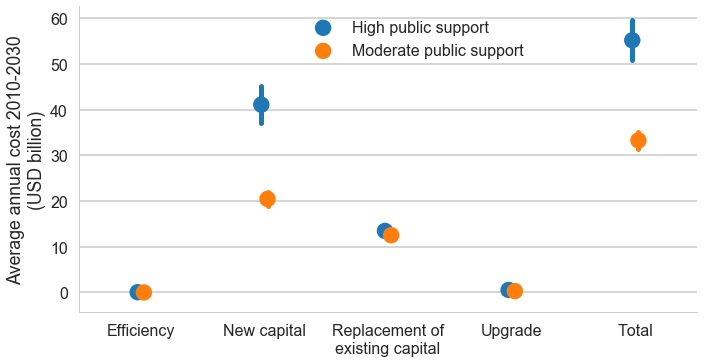

In [455]:
toplot = costs_discounted_reg2_2030_defl.drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity").drop("ZeroInvest",level="InvestmentType")
toplot = toplot.sum(level=['Item', 'Macro', 'Sensitivity','InvestmentType'])
toplot = toplot.reset_index()

toplot['costs_usd_2015'] = 1/1000*1/20*toplot['costs_usd_2015']

toplot["Item"] = toplot.Item.str.title()
toplot["Item"] = toplot.Item.replace({"Depreciation":"Replacement of\nexisting capital","Tot":"ZTotal","Expansion":"New capital"})
toplot = toplot.set_index("Item").sort_index(level="Item")
toplot = toplot.reset_index()
toplot["Item"] = toplot.Item.replace({"ZTotal":"Total"})

toplot["InvestmentType"] = toplot["InvestmentType"].replace({"Invest":"Moderate public support","MaxInvest":"High public support"})

g = sns.factorplot(x='Item',y='costs_usd_2015', hue='InvestmentType',data=toplot, kind="point",\
                   dodge=True, size=6, aspect=1.7,\
                  legend=False,join=False, ci="sd")

g.set_axis_labels("", "Average annual cost 2010-2030\n(USD billion)")
g.add_legend(title="",bbox_to_anchor=(0.55, 0.75), borderaxespad=0.)
#plt.xticks(rotation=30)

plt.savefig("irrigation_all_costs.png",ddpi=300,bbox_inches="tight")
plt.savefig("irrigation_all_costs.pdf")

In [451]:
1/1000*1/20*costs_discounted_reg2_2030_defl.mean(level="InvestmentType")

InvestmentType
Invest        2.843814
MaxInvest     4.436004
ZeroInvest    1.677874
Name: costs_usd_2015, dtype: float64

In [454]:
4.44/2.84

1.563380281690141

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

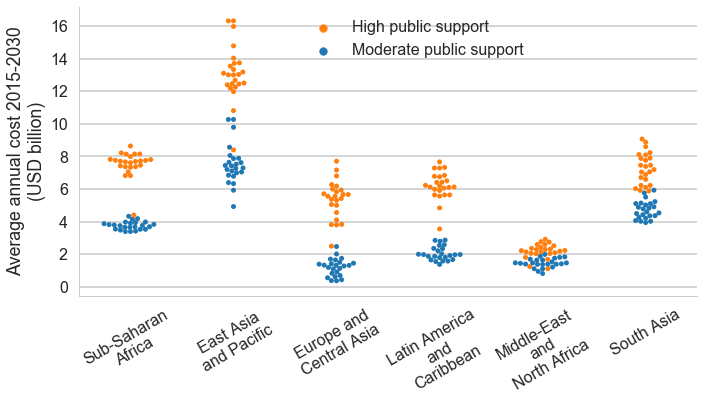

In [372]:
toplot = costs_discounted_reg2_2030_defl.drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity").drop("ZeroInvest",level="InvestmentType")
toplot = toplot.unstack("Item").drop(["TOT",'DEPRECIATION'],axis=1).sum(axis=1)
toplot = toplot.reset_index().rename(columns={0:"cost"})

#toplot['InvestmentType'] = toplot.InvestmentType.rename({"Invest":"Medium investment"})

toplot['cost'] = 1/1000*1/20*toplot['cost']

toplot["InvestmentType"] = toplot["InvestmentType"].replace({"Invest":"Moderate public support","MaxInvest":"High public support"})

toplot['Region'] = toplot.Region.replace({"EAP":"East Asia\nand Pacific",
                                             "ECA":"Europe and\nCentral Asia",
                                             "LCR":"Latin America\nand\nCaribbean",
                                             "MNA":"Middle-East\nand\nNorth Africa",
                                             "SAR":"South Asia",
                                             "AFR":"Sub-Saharan\nAfrica",
                                             "YHI":"High income"})

g = sns.factorplot(x='Region',y='cost', hue= 'InvestmentType', data=toplot, kind="swarm",\
                   dodge=False, size=6, aspect=1.7,\
                  legend=False)#,join=False, ci="sd")

g.set_axis_labels("", "Average annual cost 2015-2030\n(USD billion)")
g.add_legend(title="",bbox_to_anchor=(0.55, 0.85), borderaxespad=0.)
plt.xticks(rotation=30)



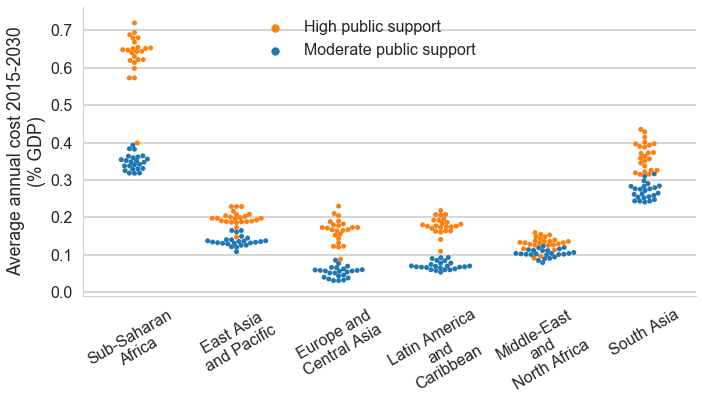

In [474]:
toplot = costs_region_over_gdp.drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity").drop("ZeroInvest",level="InvestmentType")
toplot = toplot.unstack("Item")["TOT"]
toplot = toplot.reset_index()
toplot = toplot.loc[(toplot.Year==2030),:]

#toplot['InvestmentType'] = toplot.InvestmentType.rename({"Invest":"Medium investment"})

toplot['TOT'] = 100*toplot['TOT']

toplot["InvestmentType"] = toplot["InvestmentType"].replace({"Invest":"Moderate public support","MaxInvest":"High public support"})

toplot['Region'] = toplot.Region.replace({"EAP":"East Asia\nand Pacific",
                                             "ECA":"Europe and\nCentral Asia",
                                             "LCR":"Latin America\nand\nCaribbean",
                                             "MNA":"Middle-East\nand\nNorth Africa",
                                             "SAR":"South Asia",
                                             "AFR":"Sub-Saharan\nAfrica",
                                             "YHI":"High income"})

g = sns.factorplot(x='Region',y='TOT', hue= 'InvestmentType', data=toplot, kind="swarm",\
                   dodge=False, size=6, aspect=1.7,\
                  legend=False)#,join=False, ci="sd")

g.set_axis_labels("", "Average annual cost 2015-2030\n(% GDP)")
g.add_legend(title="",bbox_to_anchor=(0.5, 0.85), borderaxespad=0.)
plt.xticks(rotation=30)

plt.savefig("irrigation_by_region.png",ddpi=300,bbox_inches="tight")
plt.savefig("irrigation_by_region.pdf")

### impact of climate change on irrigation costs

In [324]:
costs_region_over_gdp.unstack("Item")["TOT"].unstack("Sensitivity")[['RCP2p6_GDFL',
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR',
       'RCP8p5_GDFL', 'RCP8p5_HadGEM', 'RCP8p5_HadGEM_noCO2',
       'RCP8p5_IPSL', 'RCP8p5_MIROC', 'RCP8p5_NOR']].sub(costs_region_over_gdp.unstack("Item")["TOT"].unstack("Sensitivity")["Baseline"],axis=0).dropna().drop([2050,2100],level="Year")

Sensitivity                        RCP2p6_GDFL  RCP2p6_HadGEM   RCP2p6_IPSL  \
Macro InvestmentType Year Region                                              
SSP2  Invest         2030 AFR    -1.753205e-04  -1.089955e-04 -8.605604e-05   
                          EAP     6.424876e-05  -3.332451e-05  2.698997e-04   
                          ECA     1.477303e-04   2.336080e-05  1.275171e-04   
                          LCR    -8.307888e-05  -1.052948e-04 -1.038641e-04   
                          MNA    -2.076151e-05  -1.237400e-05  7.565029e-07   
                          SAR     1.222919e-04  -3.097125e-04 -1.031774e-04   
      MaxInvest      2030 AFR    -3.178594e-04  -6.090764e-04 -5.854583e-04   
                          EAP     3.903271e-05  -1.206956e-04  2.827820e-04   
                          ECA     1.244454e-04  -1.208102e-04  1.502536e-04   
                          LCR    -2.161276e-04  -5.660501e-05 -1.733612e-04   
                          MNA     3.071017e-05  -3.839947e-05  2.412846e-05   
                          SAR     1.564844e-05  -5.613970e-04 -1.911713e-04   
      ZeroInvest     2030 AFR    -6.831772e-06  -2.536923e-06 -1.484647e-06   
                          EAP    -1.415728e-06  -6.126820e-06  3.159655e-07   
                          ECA     1.000285e-06  -3.142183e-06 -1.111567e-06   
                          LCR    -3.454843e-06  -7.654895e-07 -4.590947e-06   
                          MNA    -9.739634e-07  -3.509211e-07 -3.311455e-07   
                          SAR    -1.262075e-05  -4.034155e-06 -2.650207e-07   

Sensitivity                       RCP2p6_MIROC    RCP2p6_NOR  RCP8p5_GDFL  \
Macro InvestmentType Year Region                                            
SSP2  Invest         2030 AFR         0.000051  2.306410e-05    -0.000298   
                          EAP         0.000027 -4.760793e-05    -0.000006   
                          ECA         0.000080  7.924836e-05     0.000228   
                          LCR         0.000076 -9.592152e-05    -0.000122   
                          MNA        -0.000132 -2.463530e-04    -0.000022   
                          SAR         0.000259  4.442906e-05     0.000112   
      MaxInvest      2030 AFR        -0.000292 -2.814683e-03    -0.000363   
                          EAP         0.000019 -5.338108e-04    -0.000031   
                          ECA        -0.000025 -7.937909e-04     0.000056   
                          LCR         0.000035 -8.260324e-04    -0.000174   
                          MNA        -0.000201 -4.212902e-04    -0.000050   
                          SAR         0.000431 -5.557627e-04     0.000256   
      ZeroInvest     2030 AFR        -0.000005 -8.585584e-07    -0.000010   
                          EAP        -0.000005 -8.010850e-06    -0.000001   
                          ECA        -0.000001 -2.517601e-07    -0.000002   
                          LCR        -0.000003 -7.911936e-07    -0.000003   
                          MNA        -0.000002 -6.802975e-06    -0.000001   
                          SAR        -0.000009 -7.408498e-06    -0.000001   

Sensitivity                       RCP8p5_HadGEM  RCP8p5_HadGEM_noCO2  \
Macro InvestmentType Year Region                                       
SSP2  Invest         2030 AFR     -3.086147e-04            -0.000216   
                          EAP     -3.248147e-05            -0.000017   
                          ECA      1.665498e-04             0.000221   
                          LCR     -1.504364e-04            -0.000114   
                          MNA      1.195949e-04             0.000101   
                          SAR     -2.783120e-04            -0.000166   
      MaxInvest      2030 AFR     -4.023540e-04            -0.000369   
                          EAP     -1.271010e-04            -0.000107   
                          ECA     -5.935050e-06             0.000373   
                          LCR     -1.227473e-04            -0.000085   
              

In [325]:
cc_impacts = costs_region_over_gdp.unstack("Item")["TOT"].unstack("Sensitivity")[['RCP2p6_GDFL',
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR',
       'RCP8p5_GDFL', 'RCP8p5_HadGEM', 'RCP8p5_HadGEM_noCO2',
       'RCP8p5_IPSL', 'RCP8p5_MIROC', 'RCP8p5_NOR']].sub(costs_region_over_gdp.unstack("Item")["TOT"].unstack("Sensitivity")["Baseline"],axis=0).dropna().drop([2050,2100],level="Year")

In [326]:
(cc_impacts>0).sum(axis=1)/cc_impacts.shape[1]

Macro  InvestmentType  Year  Region
SSP2   Invest          2030  AFR       0.181818
                             EAP       0.363636
                             ECA       1.000000
                             LCR       0.181818
                             MNA       0.454545
                             SAR       0.545455
       MaxInvest       2030  AFR       0.000000
                             EAP       0.272727
                             ECA       0.545455
                             LCR       0.181818
                             MNA       0.454545
                             SAR       0.454545
       ZeroInvest      2030  AFR       0.000000
                             EAP       0.090909
                             ECA       0.090909
                             LCR       0.090909
                             MNA       0.363636
                             SAR       0.000000
dtype: float64

In [330]:
inv_impacts = costs_region_over_gdp.unstack("Item")["TOT"].unstack("InvestmentType")[['Invest',"MaxInvest"]].div(costs_region_over_gdp.unstack("Item")["TOT"].unstack("InvestmentType")["ZeroInvest"],axis=0).dropna().drop([2050,2100],level="Year")

In [331]:
inv_impacts.Invest.describe()

count    144.000000
mean       3.308986
std        1.210806
min        1.565021
25%        2.512315
50%        2.894779
75%        3.800149
max        6.271065
Name: Invest, dtype: float64

In [332]:
inv_impacts.loc[inv_impacts.Invest>4,"Invest"]

Macro  Sensitivity          Year  Region
SSP1   Baseline             2030  AFR       5.177504
       Combined_Low         2030  AFR       5.196494
       Combined_Low2        2030  AFR       5.196494
SSP2   Baseline             2030  AFR       5.703564
                                  LCR       4.178011
       Combined_High        2030  AFR       6.271065
                                  LCR       4.980007
       Combined_High2       2030  AFR       5.716789
                                  LCR       4.965333
       HealthyDiet          2030  AFR       5.528328
       HealthySustDiet      2030  AFR       5.283498
       RCP2p6_GDFL          2030  AFR       5.484741
       RCP2p6_HadGEM        2030  AFR       5.552907
       RCP2p6_IPSL          2030  AFR       5.580109
       RCP2p6_MIROC         2030  AFR       5.827086
                                  LCR       4.653600
       RCP2p6_NOR           2030  AFR       5.748010
       RCP8p5_GDFL          2030  AFR       5.316311
     

## Calories

### Unfinished: trying to explore the link between the irrigation scenarios and calories per capita

In [335]:
calories_global = data.unstack("Var")["Val"]["CALO"].dropna().unstack("Region")["WLD"].unstack("Item")["TOT"]
calories_reg = data.unstack("Var")["Val"]["CALO"].dropna().unstack("Region").drop(["WLD","EC","NAM","APD"],axis=1).stack().unstack("Item")["TOT"]

In [338]:
calories_global_2030 = calories_global.unstack("Year")[2030]
calories_reg_2030 = calories_reg.unstack("Year")[2030]

In [550]:
impact_on_calories_abs = calories_reg_2030.unstack("InvestmentType")[['Invest',"MaxInvest"]].sub(calories_reg_2030.unstack("InvestmentType")["ZeroInvest"],axis=0)

In [551]:
impact_on_calories_abs

InvestmentType                            Invest  MaxInvest
Macro Sensitivity   Unit       Region                      
SSP1  Baseline      kcal/cap/d AFR      6.216187   9.968898
                               EAP     13.630512  28.454008
                               ECA     -1.809883   5.982293
                               LCR     -0.999421  17.454964
                               MNA     42.200595  45.983661
                               SAR     42.401471  72.314460
      Combined_Low  kcal/cap/d AFR      9.808993  12.067602
                               EAP      9.991651  21.252733
                               ECA     -2.914021   3.772415
                               LCR      4.698903  23.534900
                               MNA     26.460059  31.593359
                               SAR     39.977571  73.291579
      Combined_Low2 kcal/cap/d AFR      9.808993  12.067602
                               EAP      9.991651  21.252733
                               ECA     -2.914021   3.772415
                               LCR      4.698903  23.534900
                               MNA     26.460059  31.593359
                               SAR     39.977571  73.291579
SSP2  Baseline      kcal/cap/d AFR     14.893287  16.602925
                               EAP     21.014593  33.278619
                               ECA      3.053303  10.108649
                               LCR      6.545283  26.546554
                               MNA     25.427601  25.228159
                               SAR     27.492735  50.713439
      Combined_High kcal/cap/d AFR     11.243474  17.919338
                               EAP     19.634649  37.701894
                               ECA      7.740218  17.927213
                               LCR     13.795257  34.563771
                               MNA     24.335185  32.703624
                               SAR     45.900128  65.526041
...                                          ...        ...
      TradeOpen     kcal/cap/d AFR      6.439251  10.090636
                               EAP     18.229384  24.911477
                               ECA      6.767360  14.628246
                               LCR      6.485272  22.207473
                               MNA      4.363422   4.044048
                               SAR     29.902746  48.310169
      TradeRestr    kcal/cap/d AFR     28.518176  32.169436
                               EAP     10.316977  27.214568
                               ECA      3.367824  16.164500
                               LCR     11.635636  30.347199
                               MNA     79.870564  80.939683
                               SAR     27.841335  47.453008
      WatrEff_High  kcal/cap/d AFR     14.924754  16.649209
                               EAP     23.571589  34.949633
                               ECA      3.498560  11.295743
                               LCR      6.844630  28.296540
                               MNA     25.420157  32.683327
                               SAR     27.343897  52.500965
      WatrEff_Low   kcal/cap/d AFR     14.623786  16.200808
                               EAP     19.939524  31.663840
                               ECA      2.269738   9.664134
                               LCR      5.711973  24.545773
                               MNA     23.959125  25.111544
                               SAR     27.418616  50.174564
SSP3  Baseline      kcal/cap/d AFR     25.184442  29.102469
                               EAP     21.577957  30.083785
                               ECA      1.539511   8.164398
                               LCR     11.566578  27.222681
                               MNA     64.917723  66.816617
                               SAR     28.315800  30.890311

[180 rows x 2 columns]

In [342]:
impact_on_calories = 100*(calories_reg_2030.unstack("InvestmentType")[['Invest',"MaxInvest"]].div(calories_reg_2030.unstack("InvestmentType")["ZeroInvest"],axis=0)-1)

In [356]:
impact_on_calories = impact_on_calories.reset_index("Unit").drop("Unit",axis=1)

In [537]:
calories_reg_2030.reset_index("Unit").drop("Unit",axis=1).sum(level=["Macro","Sensitivity","InvestmentType"]).unstack("InvestmentType").sample(3)

2030                            
InvestmentType             Invest     MaxInvest    ZeroInvest
Macro Sensitivity                                            
SSP2  RCP2p6_MIROC   18853.063798  18919.969541  18736.276263
      Combined_High  18746.510148  18830.203118  18623.861236
      RCP2p6_GDFL    18950.922589  19033.801918  18857.137142

In [538]:
don = calories_reg_2030.reset_index("Unit").drop("Unit",axis=1).sum(level=["Macro","Sensitivity","InvestmentType"]).unstack("InvestmentType")[2030]
impact_on_calories_dev_countries = 100*(don[['Invest',"MaxInvest"]].div(don["ZeroInvest"],axis=0)-1)

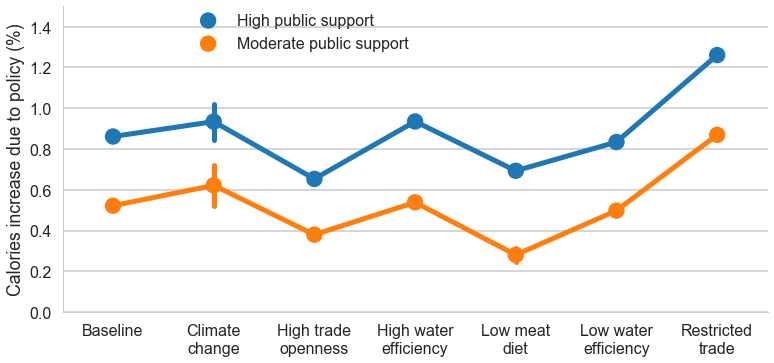

In [549]:
toplot = impact_on_calories_dev_countries.drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest','RCP2p6_GDFL',\
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR',\
       'Combined_Low','Combined_Low2','Combined_High','Combined_High2'],level="Sensitivity").drop(["SSP1","SSP3"],level="Macro")

toplot = toplot.stack().reset_index().rename(columns={0:2030})

toplot['sensi'] = toplot.Sensitivity.replace({'HealthyDiet':'Low meat\ndiet', \
                                              'HealthySustDiet':'Low meat\ndiet',\
                                              'RCP8p5_GDFL':'Climate\nchange', \
                                              'RCP8p5_HadGEM':'Climate\nchange',\
                                              'RCP8p5_HadGEM_noCO2':'Climate\nchange',\
                                              'RCP8p5_IPSL':'Climate\nchange', \
                                              'RCP8p5_MIROC':'Climate\nchange',\
                                              'RCP8p5_NOR':'Climate\nchange',\
                                              'TradeOpen':'High trade\nopenness',\
                                              'TradeRestr':'Restricted\ntrade', \
                                              'WatrEff_High':'High water\nefficiency', \
                                              'WatrEff_Low':'Low water\nefficiency'})


toplot["InvestmentType"] = toplot.InvestmentType.replace({"Invest":"2Invest",\
                                                            "MaxInvest":"1MaxInvest",\
                                                            })
toplot = toplot.set_index("InvestmentType").sort_index(level="InvestmentType")
toplot = toplot.reset_index()

toplot["InvestmentType"] = toplot["InvestmentType"].replace({"2Invest":"Moderate public support",\
                                                            "1MaxInvest":"High public support",\
                                                            })

toplot = toplot.set_index("sensi").sort_index(level="sensi").reset_index()

g = sns.factorplot(x='sensi',y=2030, hue= 'InvestmentType', data=toplot, kind="point",\
                   dodge=False, size=6, aspect=1.9,\
                  legend=False,join=True, ci="sd")

g.set_axis_labels("", "Calories increase due to policy (%)")
leg = g.ax.legend(title="",bbox_to_anchor=(0.5, 1), borderaxespad=0)
plt.xticks(rotation=0)
plt.ylim([0,1.5])

plt.savefig("calories_increase.png",bbox_extra_artists=(leg,),ddpi=300,bbox_inches="tight")

In [364]:
bill = impact_on_calories.reset_index("Region")
bill.loc[bill.Region=="SAR",:]

InvestmentType             Region    Invest  MaxInvest
Macro Sensitivity                                     
SSP1  Baseline                SAR  1.467377   2.502569
      Combined_Low            SAR  1.380954   2.531728
      Combined_Low2           SAR  1.380954   2.531728
SSP2  Baseline                SAR  0.982467   1.812270
      Combined_High           SAR  1.677474   2.394726
      Combined_High2          SAR  1.742010   2.739423
      HealthyDiet             SAR  0.707523   1.655833
      HealthySustDiet         SAR  0.585504   1.904791
      RCP2p6_GDFL             SAR  0.898124   1.673955
      RCP2p6_HadGEM           SAR  0.911897   1.394422
      RCP2p6_IPSL             SAR  0.654808   1.593560
      RCP2p6_MIROC            SAR  1.209185   1.886009
      RCP2p6_NOR              SAR  0.924928   1.566423
      RCP8p5_GDFL             SAR  0.857292   1.649489
      RCP8p5_HadGEM           SAR  0.938471   1.608060
      RCP8p5_HadGEM_noCO2     SAR  1.647356   1.825745
      RCP8p5_IPSL             SAR  0.560214   1.382566
      RCP8p5_MIROC            SAR  1.282165   2.092571
      RCP8p5_NOR              SAR  0.553472   1.658773
      Region AFR MaxInvest    SAR       NaN        NaN
      Region EAP MaxInvest    SAR       NaN        NaN
      Region ECA MaxInvest    SAR       NaN        NaN
      Region LCR MaxInvest    SAR       NaN        NaN
      Region MNA MaxInvest    SAR       NaN        NaN
      Region SAR MaxInvest    SAR       NaN        NaN
      TradeOpen               SAR  1.058721   1.710445
      TradeRestr              SAR  1.003931   1.711109
      WatrEff_High            SAR  0.977148   1.876148
      WatrEff_Low             SAR  0.979818   1.793013
SSP3  Baseline                SAR  1.057808   1.153986

In [362]:
impact_on_calories.loc[(impact_on_calories.MaxInvest>2),"MaxInvest"]

Macro  Sensitivity     Region
SSP1   Baseline        SAR       2.502569
       Combined_Low    SAR       2.531728
       Combined_Low2   SAR       2.531728
SSP2   Combined_High   SAR       2.394726
       Combined_High2  SAR       2.739423
       RCP8p5_MIROC    SAR       2.092571
       TradeRestr      MNA       2.480318
SSP3   Baseline        MNA       2.078207
Name: MaxInvest, dtype: float64

In [352]:
bob = costs_region_over_gdp.unstack("Item")["TOT"].unstack("Year")[2030].unstack("InvestmentType").drop("ZeroInvest",axis=1)

In [358]:
bob.loc[(impact_on_calories.MaxInvest>2),"MaxInvest"]

Macro  Sensitivity     Region
SSP1   Baseline        SAR       0.003377
       Combined_Low    SAR       0.003259
       Combined_Low2   SAR       0.003259
SSP2   Combined_High   SAR       0.004354
       Combined_High2  SAR       0.004283
       RCP8p5_MIROC    SAR       0.004009
       TradeRestr      MNA       0.001311
SSP3   Baseline        MNA       0.001318
Name: MaxInvest, dtype: float64

In [359]:
bob.loc[(bob.MaxInvest>0.005),"MaxInvest"]

Macro  Sensitivity           Region
SSP1   Baseline              AFR       0.006136
       Combined_Low          AFR       0.005729
       Combined_Low2         AFR       0.005729
SSP2   Baseline              AFR       0.006802
       Combined_High         AFR       0.006882
       Combined_High2        AFR       0.006303
       HealthyDiet           AFR       0.006513
       HealthySustDiet       AFR       0.006217
       RCP2p6_GDFL           AFR       0.006484
       RCP2p6_HadGEM         AFR       0.006193
       RCP2p6_IPSL           AFR       0.006216
       RCP2p6_MIROC          AFR       0.006510
       RCP8p5_GDFL           AFR       0.006439
       RCP8p5_HadGEM         AFR       0.006399
       RCP8p5_HadGEM_noCO2   AFR       0.006433
       RCP8p5_IPSL           AFR       0.005982
       RCP8p5_MIROC          AFR       0.006471
       RCP8p5_NOR            AFR       0.006686
       Region AFR MaxInvest  AFR       0.007078
       TradeOpen             AFR       0.006545
    

In [360]:
impact_on_calories.loc[(bob.MaxInvest>0.005),"MaxInvest"]

Macro  Sensitivity           Region
SSP1   Baseline              AFR       0.339156
       Combined_Low          AFR       0.413477
       Combined_Low2         AFR       0.413477
SSP2   Baseline              AFR       0.579803
       Combined_High         AFR       0.634126
       Combined_High2        AFR       0.590586
       HealthyDiet           AFR       0.416865
       HealthySustDiet       AFR       0.272734
       RCP2p6_GDFL           AFR       0.669057
       RCP2p6_HadGEM         AFR       0.674746
       RCP2p6_IPSL           AFR       0.583508
       RCP2p6_MIROC          AFR       0.527263
       RCP8p5_GDFL           AFR       0.724285
       RCP8p5_HadGEM         AFR       0.715792
       RCP8p5_HadGEM_noCO2   AFR       0.802162
       RCP8p5_IPSL           AFR       0.918705
       RCP8p5_MIROC          AFR       0.621847
       RCP8p5_NOR            AFR       0.559917
       Region AFR MaxInvest  AFR            NaN
       TradeOpen             AFR       0.348304
    

In [387]:
calories_reg_2030.sum(level=["Macro","Sensitivity","InvestmentType","Unit"]).describe()

count       78.000000
mean     18804.496835
std        185.740086
min      18136.793997
25%      18738.082674
50%      18847.162773
75%      18936.103968
max      19131.123293
Name: 2030, dtype: float64

In [388]:
tt = calories_reg_2030.sum(level=["Macro","Sensitivity","InvestmentType","Unit"])

In [389]:
tt.loc[tt>19000]

Macro  Sensitivity   InvestmentType  Unit      
SSP2   Baseline      MaxInvest       kcal/cap/d    19026.633189
       RCP2p6_GDFL   MaxInvest       kcal/cap/d    19033.801918
       RCP2p6_IPSL   MaxInvest       kcal/cap/d    19014.764632
       RCP8p5_GDFL   MaxInvest       kcal/cap/d    19011.649565
       TradeOpen     Invest          kcal/cap/d    19079.118678
                     MaxInvest       kcal/cap/d    19131.123293
                     ZeroInvest      kcal/cap/d    19006.931244
       WatrEff_High  MaxInvest       kcal/cap/d    19040.530261
       WatrEff_Low   MaxInvest       kcal/cap/d    19021.515507
Name: 2030, dtype: float64

In [390]:
toplot = calories_reg_2030.sum(level=["Macro","Sensitivity","InvestmentType","Unit"]).drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest'],level="Sensitivity")

toplot = toplot.reset_index()

In [393]:
toplot.sample(2)

,Macro,Sensitivity,InvestmentType,Unit,2030,trade
22,SSP2,HealthySustDiet,High public support,kcal/cap/d,18601.611355,Medium trade openness
37,SSP2,RCP8p5_MIROC,High public support,kcal/cap/d,18813.473967,Medium trade openness


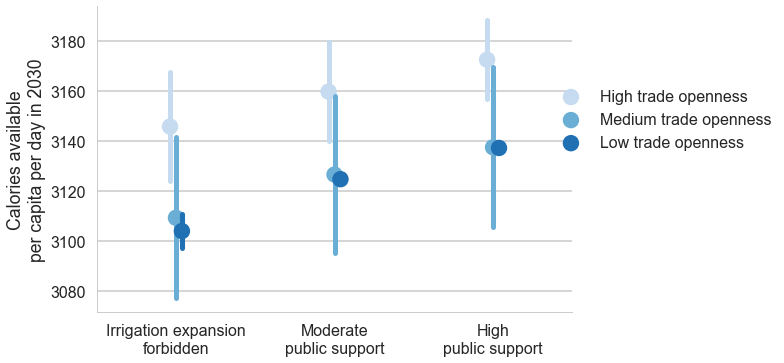

In [545]:
toplot = calories_reg_2030.mean(level=["Macro","Sensitivity","InvestmentType","Unit"]).drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest','RCP2p6_GDFL',\
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR'],level="Sensitivity")

toplot = toplot.reset_index()

toplot['trade'] = toplot.Sensitivity.replace({'Baseline':'Medium trade openness',\
                                              'Combined_Low':'Medium trade openness', \
                                              'Combined_Low2':'Low trade openness',\
                                              'Combined_High':'Medium trade openness',\
                                              'Combined_High2':'High trade openness',\
                                              'HealthyDiet':'Medium trade openness', \
                                              'HealthySustDiet':'Medium trade openness',\
                                              'RCP8p5_GDFL':'Medium trade openness', \
                                              'RCP8p5_HadGEM':'Medium trade openness',\
                                              'RCP8p5_HadGEM_noCO2':'Medium trade openness',\
                                              'RCP8p5_IPSL':'Medium trade openness', \
                                              'RCP8p5_MIROC':'Medium trade openness',\
                                              'RCP8p5_NOR':'Medium trade openness',\
                                              'TradeOpen':'High trade openness',\
                                              'TradeRestr':'Low trade openness', \
                                              'WatrEff_High':'Medium trade openness', \
                                              'WatrEff_Low':'Medium trade openness'})

toplot["trade"] = toplot.trade.replace({"Medium trade openness":"1Medium trade openness",\
                                          "Low trade openness":"2Low trade openness",\
                                          "High trade openness":"0High trade openness"})
toplot = toplot.set_index("trade").sort_index(level="trade")
toplot = toplot.reset_index()
toplot["trade"] = toplot.trade.replace({"1Medium trade openness":"Medium trade openness",\
                                          "2Low trade openness":"Low trade openness",\
                                          "0High trade openness":"High trade openness"})

toplot["InvestmentType"] = toplot.InvestmentType.replace({"Invest":"1Invest",\
                                                            "MaxInvest":"2MaxInvest",\
                                                            "ZeroInvest":"0ZeroInvest"})
toplot = toplot.set_index("InvestmentType").sort_index(level="InvestmentType")
toplot = toplot.reset_index()

toplot["InvestmentType"] = toplot["InvestmentType"].replace({"1Invest":"Moderate\npublic support",\
                                                            "2MaxInvest":"High\npublic support",\
                                                            "0ZeroInvest":"Irrigation expansion\nforbidden"})

g = sns.factorplot(x='InvestmentType',y=2030, hue= 'trade', data=toplot, kind="point",\
                   dodge=True, size=6, aspect=1.4,\
                  legend=False,join=False, ci="sd",palette="Blues")

g.set_axis_labels("", "Calories available\nper capita per day in 2030")
leg = g.ax.legend(title="",bbox_to_anchor=(0.95, 0.75), borderaxespad=0)
#plt.xticks(rotation=10)


plt.savefig("calories_trade.jpg",bbox_extra_artists=(leg,),ddpi=300,bbox_inches="tight")

In [435]:
test = calories_reg_2030.mean(level=["Macro","Sensitivity","InvestmentType","Unit"]).drop(['Region AFR MaxInvest',\
       'Region EAP MaxInvest', 'Region ECA MaxInvest',\
       'Region LCR MaxInvest', 'Region MNA MaxInvest',\
       'Region SAR MaxInvest','RCP2p6_GDFL',\
       'RCP2p6_HadGEM', 'RCP2p6_IPSL', 'RCP2p6_MIROC', 'RCP2p6_NOR'],level="Sensitivity")

In [436]:
test.loc[test>3160]

Macro  Sensitivity   InvestmentType  Unit      
SSP2   Baseline      Invest          kcal/cap/d    3160.430274
                     MaxInvest       kcal/cap/d    3171.105532
       RCP8p5_GDFL   MaxInvest       kcal/cap/d    3168.608261
       TradeOpen     Invest          kcal/cap/d    3179.853113
                     MaxInvest       kcal/cap/d    3188.520549
                     ZeroInvest      kcal/cap/d    3167.821874
       WatrEff_High  Invest          kcal/cap/d    3160.959739
                     MaxInvest       kcal/cap/d    3173.421710
       WatrEff_Low   MaxInvest       kcal/cap/d    3170.252585
Name: 2030, dtype: float64

In [206]:
global_data = costs_global_disc.reset_index().merge(calories_global_2030.reset_index().rename(columns={2030:"calories"}),on=["Macro","Sensitivity","InvestmentType"]).drop("Unit",axis=1)

In [207]:
global_data.loc[(global_data.disc<800000)&(global_data.calories>3150),:]

,Macro,Sensitivity,InvestmentType,disc,calories
0,SSP1,Baseline,Invest,451165.845831,3156.677008
1,SSP1,Baseline,MaxInvest,722743.893813,3170.809599
3,SSP1,Combined_Low,Invest,577675.473473,3152.378665
6,SSP1,Combined_Low2,Invest,577675.473473,3152.378665
9,SSP2,Baseline,Invest,503835.142093,3169.043205
11,SSP2,Baseline,ZeroInvest,218288.808541,3151.693866
24,SSP2,RCP2p6_GDFL,Invest,545609.774124,3163.066110
25,SSP2,RCP2p6_GDFL,MaxInvest,710359.227675,3163.689458
26,SSP2,RCP2p6_GDFL,ZeroInvest,506020.475831,3161.824734
27,SSP2,RCP2p6_HadGEM,Invest,493717.971093,3158.802781


In [208]:
global_data.loc[(global_data.calories<3100),:]

,Macro,Sensitivity,InvestmentType,disc,calories
14,SSP2,Combined_High,ZeroInvest,231444.615084,3098.835262
20,SSP2,HealthyDiet,ZeroInvest,204084.111982,3098.614429
21,SSP2,HealthySustDiet,Invest,466802.437610,3094.443896
23,SSP2,HealthySustDiet,ZeroInvest,203013.733492,3086.440626
47,SSP2,RCP8p5_HadGem_noCO2,ZeroInvest,228041.797480,3080.151491
75,SSP3,Baseline,Invest,505656.703094,3054.528093
76,SSP3,Baseline,MaxInvest,792461.306672,3059.900130
77,SSP3,Baseline,ZeroInvest,209277.328833,3032.044321


In [209]:
toplot = costs_region_over_gdp.reset_index().merge(calories_reg_2030.reset_index().rename(columns={2030:"calories"}),on=["Macro","Sensitivity","InvestmentType","Region"]).drop("Unit",axis=1)
toplot["percent2"] = 100*toplot.percent2

(0, 0.8)

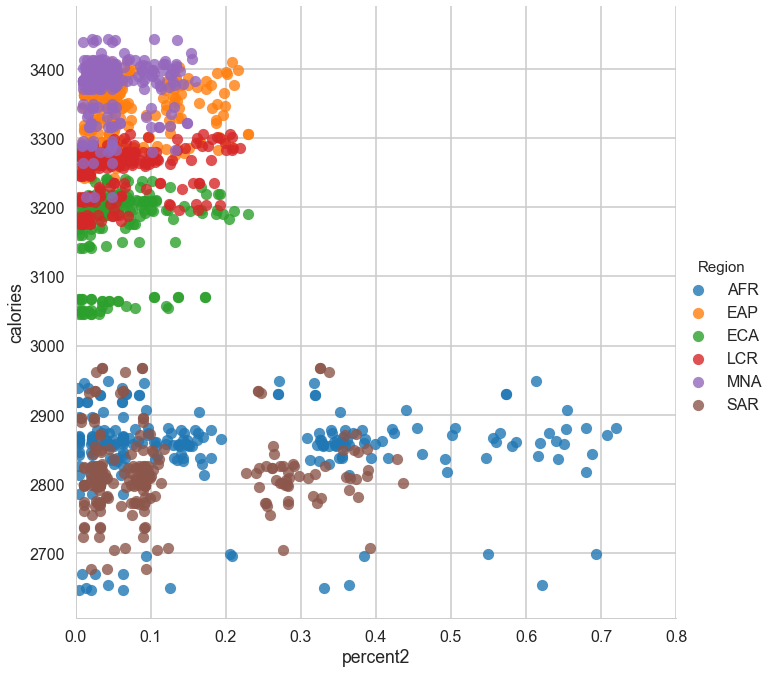

In [210]:
sns.lmplot("percent2", "calories", data=toplot, hue='Region', fit_reg=False, size=10, aspect = 1)
plt.xlim([0,0.8])